# Plot spatial and boxplot streamflow results

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

import string
import cartopy
import cartopy.crs as ccrs
import seaborn as sns
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

from pathlib import Path
from glob import glob

## Set Paths

In [2]:
# Set paths
ROOT = Path('/gpfs/work1/0/wtrcycle/users/jaerts/model_refinement_pub/')
RESULTS = f'{ROOT}/results/'
AUXDIR = f'{ROOT}/aux_data/'

## Set config

In [3]:
# Set Files
basins_shp = f"{AUXDIR}/camels-gb/CAMELS_GB_catchment_boundaries/CAMELS_GB_catchment_boundaries.shp"
results_csv = f"{RESULTS}/rf_feature_selection/rf_wflow_pcrglob_streamflow_camels_hydro_attrs.csv"

## Load basin shapefiles

In [4]:
# Read shapefile
gdf = gpd.read_file(basins_shp)
gdf = gdf.set_index('ID_STRING')
gdf.index = gdf.index.astype(int)

# Reproject shapefile
gdf = gdf.to_crs({'init':'epsg:4326'})
gdf['centroid'] = gdf.centroid.to_crs("EPSG:4326")

/home/jaerts/miniconda3/envs/wflow_state_flux/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/scratch-local/jaerts.4291379/ipykernel_2260969/1606819374.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.centroid.to_crs("EPSG:4326")


## Load and merge model results

In [5]:
# Load results dataframe
df = pd.read_csv(results_csv, index_col='basin_id')

# Merge results and shapefile
gdf_results = gdf.merge(df, left_index=True, right_index=True, how="inner")
gdf_results = gdf_results.set_geometry("centroid")

## Calculate delta results

In [6]:
gdf_results['kge_np_delta_wp'] = gdf_results['kge_np_wflow'] - gdf_results['kge_np_pcrglob']
gdf_results['kge_np_delta_pw'] = gdf_results['kge_np_pcrglob'] - gdf_results['kge_np_wflow']

## Calculate CDF and include Quantiles

In [17]:
# Add quantile rank
gdf_results['QuantileRank_wflow']= pd.qcut(gdf_results['kge_np_wflow'],
                                             q = 4, labels = False)
gdf_results['QuantileRank_pcrglob']= pd.qcut(gdf_results['kge_np_pcrglob'],
                                             q = 4, labels = False)
gdf_results['QuantileRank_delta']= pd.qcut(gdf_results['kge_np_delta_wp'],
                                             q = 4, labels = False)

N = len(gdf_results)
x_wflow = np.sort(gdf_results['kge_np_wflow'].values)
y_wflow = np.arange(N) / float(N)

x_pcrglob = np.sort(gdf_results['kge_np_pcrglob'].values)
y_pcrglob = np.arange(N) / float(N)

x_delta = np.sort(gdf_results['kge_np_delta_wp'].values)
y_delta = np.arange(N) / float(N)

Q25_wflow_min = gdf_results.loc[gdf_results['QuantileRank_wflow'] == 0]['kge_np_wflow'].min()
Q25_wflow_max = gdf_results.loc[gdf_results['QuantileRank_wflow'] == 0]['kge_np_wflow'].max()

Q50_wflow_min = gdf_results.loc[gdf_results['QuantileRank_wflow'] == 1]['kge_np_wflow'].min()
Q50_wflow_max = gdf_results.loc[gdf_results['QuantileRank_wflow'] == 1]['kge_np_wflow'].max()

Q75_wflow_min = gdf_results.loc[gdf_results['QuantileRank_wflow'] == 2]['kge_np_wflow'].min()
Q75_wflow_max = gdf_results.loc[gdf_results['QuantileRank_wflow'] == 2]['kge_np_wflow'].max()

Q100_wflow_min = gdf_results.loc[gdf_results['QuantileRank_wflow'] == 3]['kge_np_wflow'].min()
Q100_wflow_max = gdf_results.loc[gdf_results['QuantileRank_wflow'] == 3]['kge_np_wflow'].max()


Q25_pcrglob_min = gdf_results.loc[gdf_results['QuantileRank_pcrglob'] == 0]['kge_np_pcrglob'].min()
Q25_pcrglob_max = gdf_results.loc[gdf_results['QuantileRank_pcrglob'] == 0]['kge_np_pcrglob'].max()

Q50_pcrglob_min = gdf_results.loc[gdf_results['QuantileRank_pcrglob'] == 1]['kge_np_pcrglob'].min()
Q50_pcrglob_max = gdf_results.loc[gdf_results['QuantileRank_pcrglob'] == 1]['kge_np_pcrglob'].max()

Q75_pcrglob_min = gdf_results.loc[gdf_results['QuantileRank_pcrglob'] == 2]['kge_np_pcrglob'].min()
Q75_pcrglob_max = gdf_results.loc[gdf_results['QuantileRank_pcrglob'] == 2]['kge_np_pcrglob'].max()

Q100_pcrglob_min = gdf_results.loc[gdf_results['QuantileRank_pcrglob'] == 3]['kge_np_pcrglob'].min()
Q100_pcrglob_max = gdf_results.loc[gdf_results['QuantileRank_pcrglob'] == 3]['kge_np_pcrglob'].max()

Q25_delta_min = gdf_results.loc[gdf_results['QuantileRank_delta'] == 0]['kge_np_delta_wp'].min()
Q25_delta_max = gdf_results.loc[gdf_results['QuantileRank_delta'] == 0]['kge_np_delta_wp'].max()

Q50_delta_min = gdf_results.loc[gdf_results['QuantileRank_delta'] == 1]['kge_np_delta_wp'].min()
Q50_delta_max = gdf_results.loc[gdf_results['QuantileRank_delta'] == 1]['kge_np_delta_wp'].max()

Q75_delta_min = gdf_results.loc[gdf_results['QuantileRank_delta'] == 2]['kge_np_delta_wp'].min()
Q75_delta_max = gdf_results.loc[gdf_results['QuantileRank_delta'] == 2]['kge_np_delta_wp'].max()

Q100_delta_min = gdf_results.loc[gdf_results['QuantileRank_delta'] == 3]['kge_np_delta_wp'].min()
Q100_delta_max = gdf_results.loc[gdf_results['QuantileRank_delta'] == 3]['kge_np_delta_wp'].max()


# df_wflow = df_wflow.drop(columns=['QuantileRank'])

df_wflow=pd.DataFrame(data=[x_wflow,y_wflow]).T
df_wflow.columns=['KGE-NP','CDF']

df_pcrglob=pd.DataFrame(data=[x_pcrglob,y_pcrglob]).T
df_pcrglob.columns=['KGE-NP','CDF']

df_delta=pd.DataFrame(data=[x_delta,y_delta]).T
df_delta.columns=['KGE-NP','CDF']

In [18]:
df_wflow.loc[df_wflow['KGE-NP'] < -1, 'KGE-NP'] = -1.05
df_pcrglob.loc[df_pcrglob['KGE-NP'] < -1, 'KGE-NP'] = -1.05

df_delta.loc[df_delta['KGE-NP'] < -1, 'KGE-NP'] = -1.05
df_delta.loc[df_delta['KGE-NP'] > 1, 'KGE-NP'] = 1.05


## Create spatial plot

/scratch-local/jaerts.4291379/ipykernel_2260969/57117473.py:161: UserWarning: FixedFormatter should only be used together with FixedLocator
  cmap.set_yticklabels(yticks)
/scratch-local/jaerts.4291379/ipykernel_2260969/57117473.py:163: UserWarning: FixedFormatter should only be used together with FixedLocator
  cmap.set_yticklabels(yticks)
/scratch-local/jaerts.4291379/ipykernel_2260969/57117473.py:165: UserWarning: FixedFormatter should only be used together with FixedLocator
  cmap.set_yticklabels(yticks)
/scratch-local/jaerts.4291379/ipykernel_2260969/57117473.py:173: UserWarning: FixedFormatter should only be used together with FixedLocator
  cmap.set_xticklabels(xticks)
/scratch-local/jaerts.4291379/ipykernel_2260969/57117473.py:176: UserWarning: FixedFormatter should only be used together with FixedLocator
  cmap.set_xticklabels(xticks)
/scratch-local/jaerts.4291379/ipykernel_2260969/57117473.py:181: UserWarning: FixedFormatter should only be used together with FixedLocator
  cma

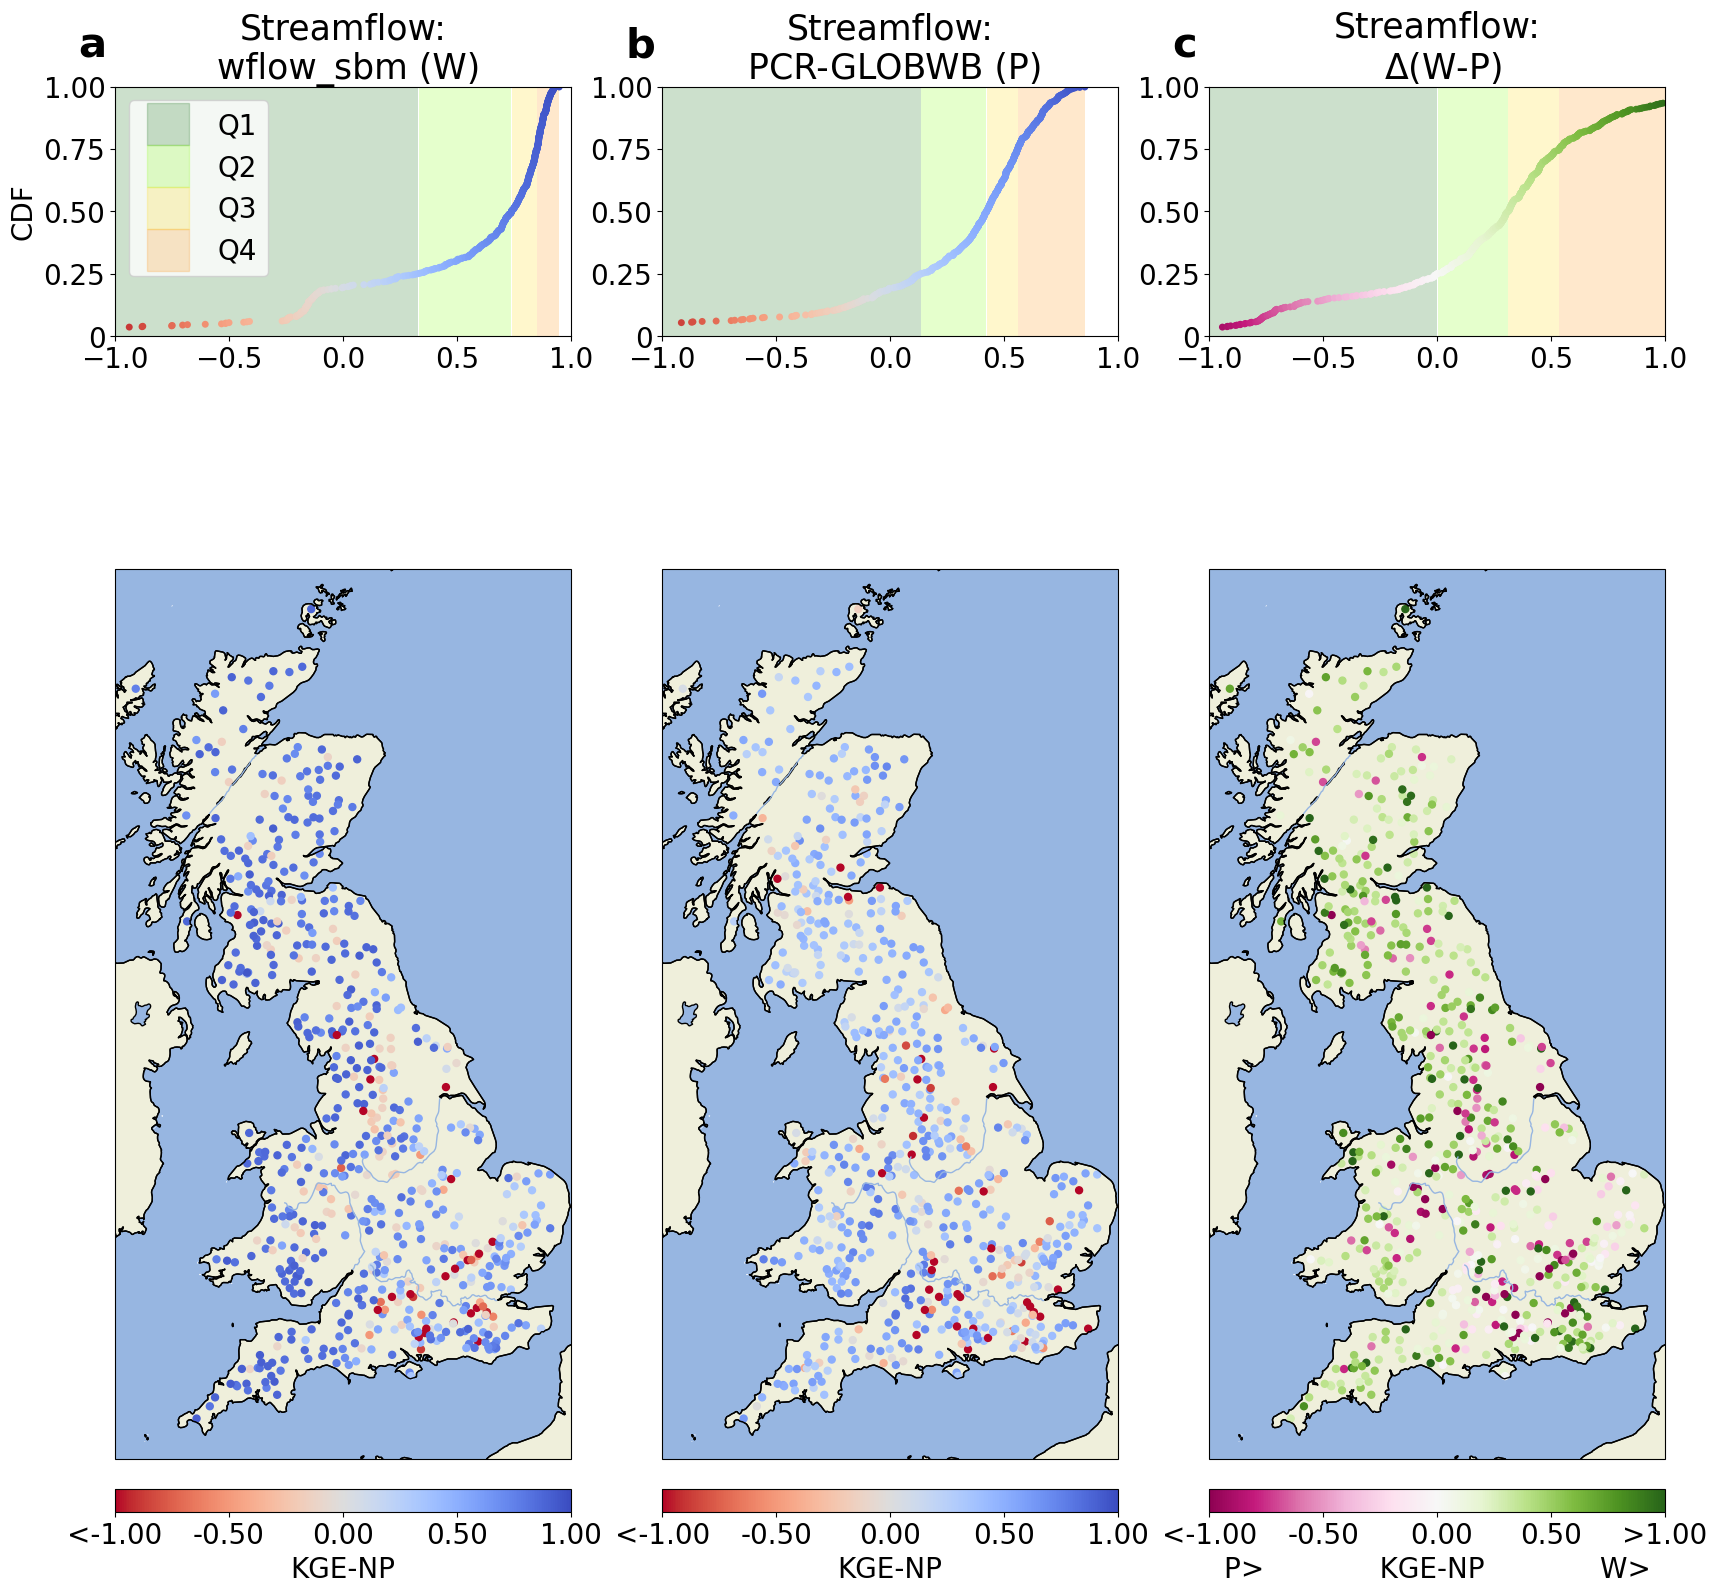

In [30]:
import string
import matplotlib.lines as mlines
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['lines.markersize'] = 5  

# fig, axes = plt.subplots(2, 3,figsize=(20, 20), subplot_kw={"projection": ccrs.PlateCarree()}, gridspec_kw={'height_ratios': [1, 2], 'width_ratios':[1,1,1]})
fig, axes = plt.subplots(2, 3,figsize=(20, 20), gridspec_kw={'height_ratios': [1, 12], 'width_ratios':[1,1,1]})



# fig.add_subplot(211, projection=ccrs.PlateCarree())
# plt.subplots_adjust(wspace=0.05, hspace=0)

colormap1 = 'coolwarm_r'
colormap2 = 'PiYG'
cmap = plt.cm.get_cmap(colormap1)



axes[0,0].axvspan(Q25_wflow_min,
            Q25_wflow_max,
            color="darkgreen", alpha=0.2, lw=0)
axes[0,0].axvspan(Q50_wflow_min,
            Q50_wflow_max,
            color="chartreuse", alpha=0.2, lw=0)
axes[0,0].axvspan(Q75_wflow_min,
            Q75_wflow_max,
            color="gold", alpha=0.2, lw=0)
axes[0,0].axvspan(Q100_wflow_min,
            Q100_wflow_max,
            color="darkorange", alpha=0.2, lw=0)


rect1 = mlines.Line2D([], [], marker="s", markersize=30, linewidth=0, color="darkgreen", alpha=0.2)
rect2 = mlines.Line2D([], [], marker="s", markersize=30, linewidth=0, color="chartreuse",alpha=0.2)
rect3 = mlines.Line2D([], [], marker="s", markersize=30, linewidth=0, color="gold", alpha=0.2)
rect4 = mlines.Line2D([], [], marker="s", markersize=30, linewidth=0, color="darkorange",alpha=0.2)

axes[0,0].legend((rect1, rect2, rect3, rect4), ('Q1', 'Q2', 'Q3', 'Q4'))

ax1 = sns.scatterplot(ax=axes[0,0], data=df_wflow, x='KGE-NP', y='CDF', hue='KGE-NP', palette=colormap1, legend=None, linewidth=0)
ax1.set_xlim(-1, 1)
ax1.set_ylim(0,1)


axes[0,1].axvspan(Q25_pcrglob_min,
            Q25_pcrglob_max,
            color="darkgreen", alpha=0.2, lw=0)
axes[0,1].axvspan(Q50_pcrglob_min,
            Q50_pcrglob_max,
            color="chartreuse", alpha=0.2, lw=0)

axes[0,1].axvspan(Q75_pcrglob_min,
            Q75_pcrglob_max,
            color="gold", alpha=0.2, lw=0)
axes[0,1].axvspan(Q100_pcrglob_min,
            Q100_pcrglob_max,
            color="darkorange", alpha=0.2, lw=0)




ax2 = sns.scatterplot(ax=axes[0,1], data=df_pcrglob, x='KGE-NP', y='CDF', hue='KGE-NP', palette=colormap1, legend=None,linewidth=0)
ax2.set_xlim(-1, 1)
ax2.set_ylim(0,1)

axes[0,2].axvspan(Q25_delta_min,
            Q25_delta_max,
            color="darkgreen", alpha=0.2, lw=0)
axes[0,2].axvspan(Q50_delta_min,
            Q50_delta_max,
            color="chartreuse", alpha=0.2, lw=0)
axes[0,2].axvspan(Q75_delta_min,
            Q75_delta_max,
            color="gold", alpha=0.2, lw=0)
axes[0,2].axvspan(Q100_delta_min,
            Q100_delta_max,
            color="darkorange", alpha=0.2, lw=0)


ax3 = sns.scatterplot(ax=axes[0,2], data=df_delta, x='KGE-NP', y='CDF', hue='KGE-NP', palette=colormap2, legend=None,linewidth=0)
ax3.set_xlim(-1, 1)
ax3.set_ylim(0,1)

ax1.set(xlabel=None)
ax2.set(xlabel=None, ylabel=None)
ax3.set(xlabel=None, ylabel=None)

fig.delaxes(axes[1,0])
axes[1,0] = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4 = gdf_results.plot(ax=axes[1,0], column='kge_np_wflow',
                        cmap=colormap1,
                        vmin=-1.0,
                        vmax=1.0,
                        legend=True,
                        legend_kwds={'label': "KGE-NP",
                                     'orientation': "horizontal",
                                     "fraction":0.046,
                                     "pad":0.01},
                       
                      )

fig.delaxes(axes[1,1])
axes[1,1] = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())

ax5 = gdf_results.plot(ax=axes[1,1], column='kge_np_pcrglob',
                        cmap=colormap1,
                        vmin=-1.0,
                        vmax=1.0,
                        legend=True,
                        legend_kwds={'label': "KGE-NP",
                                     'orientation': "horizontal",
                                     "fraction":0.046,
                                     "pad":0.01,
                                    })
fig.delaxes(axes[1,2])
axes[1,2] = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())

ax6 = gdf_results.plot(ax=axes[1,2], column='kge_np_delta_wp',
                        cmap=colormap2,
                        vmin=-1.0,
                        vmax=1.0,
                        legend=True,
                        legend_kwds={'label': "P>             KGE-NP             W>",
                                     'orientation': "horizontal",
                                     "fraction":0.046,
                                     "pad":0.01,
                                    })

ax4.add_feature(cartopy.feature.OCEAN)
ax4.add_feature(cartopy.feature.LAND, edgecolor='black')
ax4.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax4.add_feature(cartopy.feature.RIVERS)
ax4.coastlines(resolution='10m')

ax5.add_feature(cartopy.feature.OCEAN)
ax5.add_feature(cartopy.feature.LAND, edgecolor='black')
ax5.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax5.add_feature(cartopy.feature.RIVERS)
ax5.coastlines(resolution='10m')

ax6.add_feature(cartopy.feature.OCEAN)
ax6.add_feature(cartopy.feature.LAND, edgecolor='black')
ax6.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax6.add_feature(cartopy.feature.RIVERS)
ax6.coastlines(resolution='10m')

ax1.set_title('Streamflow:\n wflow_sbm (W)', size=25)
ax2.set_title('Streamflow:\n PCR-GLOBWB (P)', size=25)
ax3.set_title('Streamflow:\n $\Delta$(W-P)', size=25)

axes[0,0].text(-0.08,1.12, string.ascii_lowercase[0], transform=axes[0,0].transAxes, 
            size=30, weight='bold')
axes[0,1].text(-0.08,1.12, string.ascii_lowercase[1], transform=axes[0,1].transAxes, 
            size=30, weight='bold')
axes[0,2].text(-0.08,1.12, string.ascii_lowercase[2], transform=axes[0,2].transAxes, 
            size=30, weight='bold')

yticks=['0','0.25','0.50','0.75','1.00']
cmap = ax1.get_figure().get_axes()[0]
cmap.set_yticklabels(yticks)
cmap = ax1.get_figure().get_axes()[1]
cmap.set_yticklabels(yticks)
cmap = ax1.get_figure().get_axes()[2]
cmap.set_yticklabels(yticks)




xticks = xticks = ['<-1.00','-0.50','0.00','0.50','1.00']
cmap = ax1.get_figure().get_axes()[4]
cmap.get_xticks()
cmap.set_xticklabels(xticks)

cmap = ax2.get_figure().get_axes()[6]
cmap.set_xticklabels(xticks)

xticks = ['<-1.00','-0.50',' 0.00','0.50','>1.00']
cmap = ax3.get_figure().get_axes()[8]
cmap.get_xticks()
cmap.set_xticklabels(xticks)

plt.subplots_adjust(wspace=0.2, hspace=-1.05)

plt.savefig(f'/home/jaerts/model_refinement_master/new_scripts/figures/1_fig_streamflow_evaluation_spatial_3.png', bbox_inches='tight', dpi=400)